In [146]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import r_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [147]:
df = pd.read_csv("/Users/admin/Downloads/202301_06.csv", index_col='timestamp')

In [148]:
# filter where hr or hb is  not 0
fil_df = df[(df['sys_hr'] != 0) | (df['sys_hb'] != 0)]
# replace NaN values with 0? median imputation
fil_df = fil_df.fillna(fil_df.median())

In [149]:
fil_df.head(5)

,sys_kw,sys_cl,sys_hr,sys_hb,sys_eff,ch_sysef,air_eff,h_chwst,h_chwrt,h_cwst,...,ahu_ilp_1_ph,ahu_ilp_1_mvp,ahu_ilp_1_fl,ahu_ilp_1_freq,ahu_ilp_1_rpm,ahu_ilp_2_ph,ahu_ilp_2_mvp,ahu_ilp_2_fl,ahu_ilp_2_freq,ahu_ilp_2_rpm
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-12 10:31:00,25.994081,230.706284,236.019318,25.477787,0.303707,0.109001,0.199254,16.349094,22.626659,25.654757,...,5.25,27.560001,119.680016,26.070564,2585.0,5.020000,27.560001,128.480011,26.233126,2580.0
2023-03-12 10:32:00,27.562376,39.721329,-9.834330,-612.514709,1.893862,0.693894,1.201483,21.504156,22.107063,26.077427,...,5.33,27.560001,118.360008,26.263605,2582.0,5.020000,27.560001,128.480011,26.304247,2572.0
2023-03-12 10:33:00,39.973473,1.050578,65.076706,-93.209633,139.025558,38.049030,45.365986,21.185747,21.151075,26.000360,...,5.33,27.560001,117.480019,26.314405,2590.0,5.020000,27.560001,127.600006,26.172165,2576.0
2023-03-12 10:34:00,43.150501,83.418709,160.046906,-51.843536,1.179878,0.523932,0.577734,20.328979,21.329203,25.537401,...,5.25,27.560001,119.240005,26.304247,2589.0,5.020000,27.560001,128.040009,26.253445,2584.0
2023-03-12 10:35:00,49.378506,127.538132,142.273010,-7.788623,0.760313,0.387167,0.374602,19.742857,21.591053,25.541592,...,5.25,27.560001,119.240005,26.162006,2589.0,4.940001,27.560001,129.360001,26.121365,2572.0


# Feature Extraction

In [150]:
df_chiller = fil_df[["sys_hb", "h_chwst", "h_chwrt", "h_cwst", "h_cwrt", "h_chwf", "h_cwf", "ch_1_kwe", "ch_2_kwe", "pchwp_1_kw", "pchwp_2_kw", "cwp_1_kw", "cwp_2_kw", "ct_1_kw", "ct_2_kw", "sys_cl", "sys_hr", "sys_kw"]]
X = df_chiller
y = fil_df[["ch_sysef"]]

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [151]:
r_regression(X,y)

array([ 0.00740573, -0.05181569, -0.04025291,  0.01232794,  0.01983035,
        0.00956881,  0.04427938,  0.02710178,  0.01766093,  0.0055482 ,
        0.0093238 ,  0.01066158,  0.01335101,  0.05690774,  0.06027076,
        0.0587592 ,  0.06270775,  0.07872202])

comment
the last 5 features are the most significant contributor to chiller efficiency
which are cooling tower power inputs, cooling load, heat rejection, power input, normalization isn't necessary for pearson's test

## PCA

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

n_list = [i for i in range(1,11)]
r_squared = {}

for n in n_list:
    pca_n = make_pipeline(PCA(n_components = n), LinearRegression())
    pca_n.fit(X_train, y_train)

    r_squared_value = pca_n.score(X_test, y_test)
    r_squared[n] =  r_squared_value


In [ ]:
x

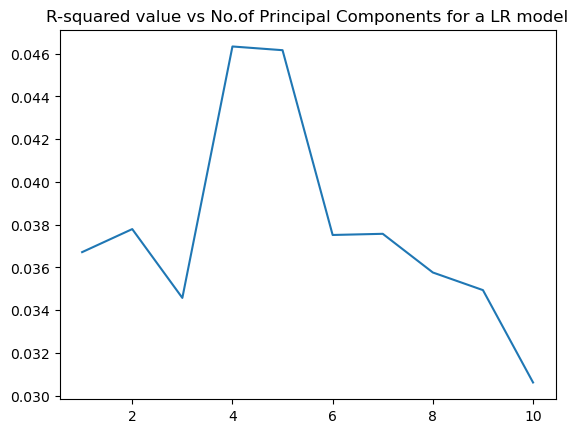

In [157]:
n = r_squared.keys()
values = r_squared.values()
plt.plot(n,values)
plt.title("R-squared value vs No.of Principal Components for a LR model")
plt.show()